In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import math

In [3]:
NSL_x_train = pd.read_pickle('NSL_x_train_dummy.pkl').values
NSL_x_test = pd.read_pickle('NSL_x_test_dummy.pkl').values
NSL_x_test_21 = pd.read_pickle('NSL_x_test_21_dummy.pkl').values
NSL_y_train_type = pd.read_pickle('NSL_y_train_col_5.pkl').values
NSL_y_test_type = pd.read_pickle('NSL_y_test_col_5.pkl').values
NSL_y_test_21_type = pd.read_pickle('NSL_y_test_21_col_5.pkl').values
NSL_y_train_binary = pd.read_pickle('NSL_y_train_col_1.pkl').values
NSL_y_test_binary = pd.read_pickle('NSL_y_test_col_1.pkl').values
NSL_y_test_21_binary = pd.read_pickle('NSL_y_test_21_col_1.pkl').values
NSL_y_train_intrusion = pd.read_pickle('NSL_y_train_col_40.pkl').values
NSL_y_test_intrusion = pd.read_pickle('NSL_y_test_col_40.pkl').values
NSL_y_test_21_intrusion = pd.read_pickle('NSL_y_test_21_col_40.pkl').values

In [ ]:
KDD_x_train = pd.read_pickle('KDD_x_train_dummy.pkl').values
KDD_x_test = pd.read_pickle('KDD_x_test_dummy.pkl').values
KDD_y_train_type = pd.read_pickle('KDD_y_train_col_5.pkl').values
KDD_y_test_type = pd.read_pickle('KDD_y_test_col_5.pkl').values
KDD_y_train_binary = pd.read_pickle('KDD_y_train_col_1.pkl').values
KDD_y_test_binary = pd.read_pickle('KDD_y_test_col_1.pkl').values
KDD_y_train_intrusion = pd.read_pickle('KDD_y_train_col_40.pkl').values
KDD_y_test_intrusion = pd.read_pickle('KDD_y_test_col_40.pkl').values

In [4]:
x_train = pd.read_pickle('NSL_x_train_dummy.pkl').values
x_test = pd.read_pickle('NSL_x_test_dummy.pkl').values
x_test21 = pd.read_pickle('NSL_x_test_21_dummy.pkl').values
y_train_type = pd.read_pickle('NSL_y_train_col_5.pkl').values
y_test_type = pd.read_pickle('NSL_y_test_col_5.pkl').values
y_test21_type = pd.read_pickle('NSL_y_test_21_col_5.pkl').values

x_train_norm= normalize(x_train, axis=1, norm='l2')
x_test_norm= normalize(x_test, axis=1, norm='l2')
x_test21_norm = normalize(x_test21, axis=1, norm='l2')

In [43]:
pca = PCA(n_components=2)
NSL_mask = np.random.choice([False, True], len(np.concatenate((NSL_x_train,NSL_x_test), axis=0)), p=[0.99, 0.01])
NSL_to_pca_x = np.concatenate((NSL_x_train,NSL_x_test))[NSL_mask]

# NSL_x_data_2d = pca.fit_transform(NSL_to_pca_x)
NSL_x_data_2d = TSNE(n_components=2, method='barnes_hut').fit_transform(NSL_to_pca_x)
NSL_y_data_sampled = np.concatenate((NSL_y_train_type, NSL_y_test_type), axis=0)[NSL_mask]

                              
KDD_mask = np.random.choice([False, True], len(np.concatenate((KDD_x_train,KDD_x_test), axis=0)), p=[0.998, 0.002])
KDD_to_pca_x = np.concatenate((KDD_x_train,KDD_x_test), axis=0)[KDD_mask]

# KDD_x_data_2d = pca.fit_transform(KDD_to_pca_x)
KDD_x_data_2d = TSNE(n_components=2, method='barnes_hut').fit_transform(KDD_to_pca_x)
KDD_y_data_sampled = np.concatenate((KDD_y_train_type, KDD_y_test_type), axis=0)[KDD_mask]

In [44]:
NSL_x_data_2d.shape

(1503, 2)

In [7]:
index_to_type_dict = {
        0 : 'normal',
        1 : 'dos',
        2 : 'r2l',
        3 : 'u2r',
        4 : 'probe'
    }

def plot_PCA(x_data_2d, y_data):
    SMALL_SIZE = 13
    MEDIUM_SIZE = 17
    BIGGER_SIZE = 50

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    #plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    fig, ax = plt.subplots()
    possible_colors = ['red', 'dodgerblue', 'chartreuse', 'yellow', 'm']
    colors = []
    x_list = []
    y_list = []
    classes = []
    for row in range(x_data_2d.shape[0]):
        x, y = x_data_2d[row]
        index = np.argmax(y_data[row])
        x_list.append(x)
        y_list.append(y)
        colors.append(possible_colors[index])
        classes.append(index_to_type_dict[index])
    unique = ['normal', 'dos', 'r2l', 'u2r', 'probe']
    print(unique)
    for i, u in enumerate(unique):
        xi = [x_list[j] for j  in range(len(x_list)) if classes[j] == u]
        yi = [y_list[j] for j  in range(len(x_list)) if classes[j] == u]
        plt.scatter(xi, yi, c=possible_colors[i], label=str(u))
    plt.title('PCA Dimension-2 Scatterplot of the NSL-KDD Dataset', fontsize=17)
    #plt.title('PCA Dimension-2 Scatterplot of the KDDCup99 Dataset', fontsize=17)
    plt.legend(loc='upper right')
    plt.show()


def distance(x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2 + (y1-y2)**2)


def remove_outliers(a, outlierConstant):
    xarr = a[:, 0]
    yarr = a[:, 1]
    xmean = np.mean(xarr)
    ymean = np.mean(yarr)
    xstd = np.std(xarr)
    ystd = np.std(yarr)
    outlier_dist_from_mean = outlierConstant * math.sqrt(xstd**2+ystd**2)
    row = 0
    while row < np.size(a, 0):
        if distance(a[row][0], a[row][1], xmean, ymean) > outlier_dist_from_mean:
            a = np.delete(a, row, axis=0)
            row = row - 1
        row = row + 1
    return a

In [121]:
#NSL_x_data_2d_no_outliers = removeOutliers(NSL_x_data_2d, 0.01)
#KDD_x_data_2d_no_outliers = removeOutliers(KDD_x_data_2d, 0.01)

['normal', 'dos', 'r2l', 'u2r', 'probe']


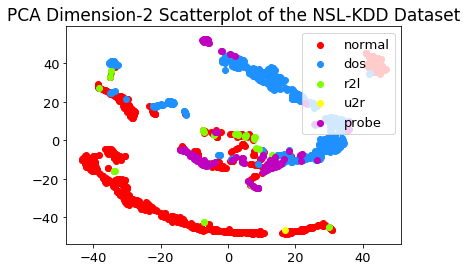

In [131]:
plot_PCA(NSL_x_data_2d, NSL_y_data_sampled)

['normal', 'dos', 'r2l', 'u2r', 'probe']


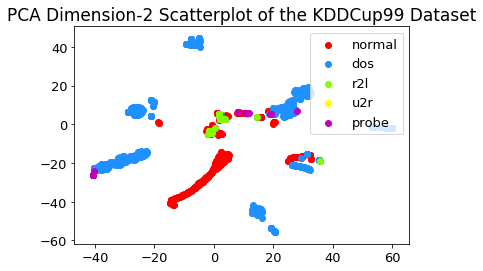

In [129]:
plot_PCA(KDD_x_data_2d, KDD_y_data_sampled)

In [41]:
NSL_x_data_2d.shape

(753, 2)

In [23]:

def plot_PCA_advanced(clss):
    """ cls == index (int)
        Plot the U2R class, but differentiate between train and test data """

    x_train_cls = []
    y_train_cls = []
    for i in range(x_train_norm.shape[0]):
        if np.argmax(y_train_type[i]) == clss:
            x_train_cls.append(list(x_train_norm[i]))
            y_train_cls.append(list(y_train_type[i]))
    x_test_cls = []
    y_test_cls = []
    for i in range(x_test_norm.shape[0]):
        if np.argmax(y_test_type[i]) == clss:
            x_test_cls.append(list(x_test_norm[i]))
            y_test_cls.append(list(y_test_type[i]))   
            
    x_together = np.concatenate((x_train_cls, x_test_cls), axis=0)
    x_together_2d = TSNE(n_components=2, method='barnes_hut').fit_transform(x_together)
    
    x_train_cls_2d = x_together_2d[0:len(x_train_cls)]
    x_test_cls_2d = x_together_2d[len(x_train_cls):]
    
    SMALL_SIZE = 13
    MEDIUM_SIZE = 17
    BIGGER_SIZE = 50

    plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
    plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
    plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
    plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
    plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
    #plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
    
    x_train_vals = [row[0] for row in x_train_cls_2d]
    y_train_vals = [row[1] for row in x_train_cls_2d]
    
    x_test_vals = [row[0] for row in x_test_cls_2d]
    y_test_vals = [row[1] for row in x_test_cls_2d]
    plt.scatter(x_train_vals, y_train_vals, color = 'red', label = index_to_type_dict[clss] + ' train', alpha=0.05)
    plt.scatter(x_test_vals, y_test_vals, color = 'blue', label = index_to_type_dict[clss] + ' test', alpha=0.05)
    
    plt.title('Scatter', fontsize=17)
    #plt.title('PCA Dimension-2 Scatterplot of the KDDCup99 Dataset', fontsize=17)
    plt.legend(loc='lower right')
    plt.show()

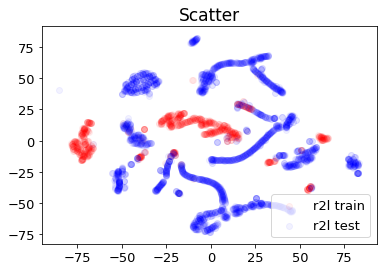

In [24]:
plot_PCA_advanced(2)